In [3]:
import pandas as pd

file_path = '/Users/rohith/Documents/Datasets/Gender_Recg_By_Voice/voice.csv'
df = pd.read_csv(file_path)

In [4]:
print(df)

      meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
5     0.132786  0.079557  0.119090  0.067958  0.209592  0.141634   1.932562   
6     0.150762  0.074463  0.160106  0.092899  0.205718  0.112819   1.530643   
7     0.160514  0.076767  0.144337  0.110532  0.231962  0.121430   1.397156   
8     0.142239  0.078018  0.138587  0.088206  0.208587  0.120381   1.099746   
9     0.134329  0.080350  0.121451  0.075580  0.201957  0.126377   1.190368   
10    0.157021  0.071943  0.168160  0.101430  0.216740  0.115310   0.979442   
11    0.138551  0.077054  0.127527  0.087314  0.2027

In [5]:
from scipy.stats import pearsonr

cols = df.columns
for i in range(len(cols)-2):
    for j in range(i+1,len(cols)-1):
        r = pearsonr(df[cols[i]],df[cols[j]])
        print('Correlation between',cols[i],'and',cols[j],'is',r[0])

('Correlation between', 'meanfreq', 'and', 'sd', 'is', -0.73903880842248781)
('Correlation between', 'meanfreq', 'and', 'median', 'is', 0.92544537304632124)
('Correlation between', 'meanfreq', 'and', 'Q25', 'is', 0.91141634632444468)
('Correlation between', 'meanfreq', 'and', 'Q75', 'is', 0.74099671832241198)
('Correlation between', 'meanfreq', 'and', 'IQR', 'is', -0.62760505356772234)
('Correlation between', 'meanfreq', 'and', 'skew', 'is', -0.32232692772884919)
('Correlation between', 'meanfreq', 'and', 'kurt', 'is', -0.31603555475112127)
('Correlation between', 'meanfreq', 'and', 'sp.ent', 'is', -0.601202540678348)
('Correlation between', 'meanfreq', 'and', 'sfm', 'is', -0.78433231329995601)
('Correlation between', 'meanfreq', 'and', 'mode', 'is', 0.68771522418362907)
('Correlation between', 'meanfreq', 'and', 'centroid', 'is', 1.0)
('Correlation between', 'meanfreq', 'and', 'meanfun', 'is', 0.46084440175998742)
('Correlation between', 'meanfreq', 'and', 'minfun', 'is', 0.3839367930

In [6]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale
import numpy as np

x_1 = df['meanfreq']
x_2 = df['median']
x_1 = np.array(x_1)
x_2 = np.array(x_2)

x_1 = scale(x_1)
x_2 = scale(x_2)
X = []
for i in range(len(x_1)):
    X.append([x_1[i],x_2[i]])
    
X = np.array(X)

print(X.shape)
pca = PCA(n_components=1)
pca.fit(X)

transformed_X = pca.transform(X)

(3168, 2)


In [9]:
transformed_X = scale(transformed_X)
print(transformed_X.std())

1.0


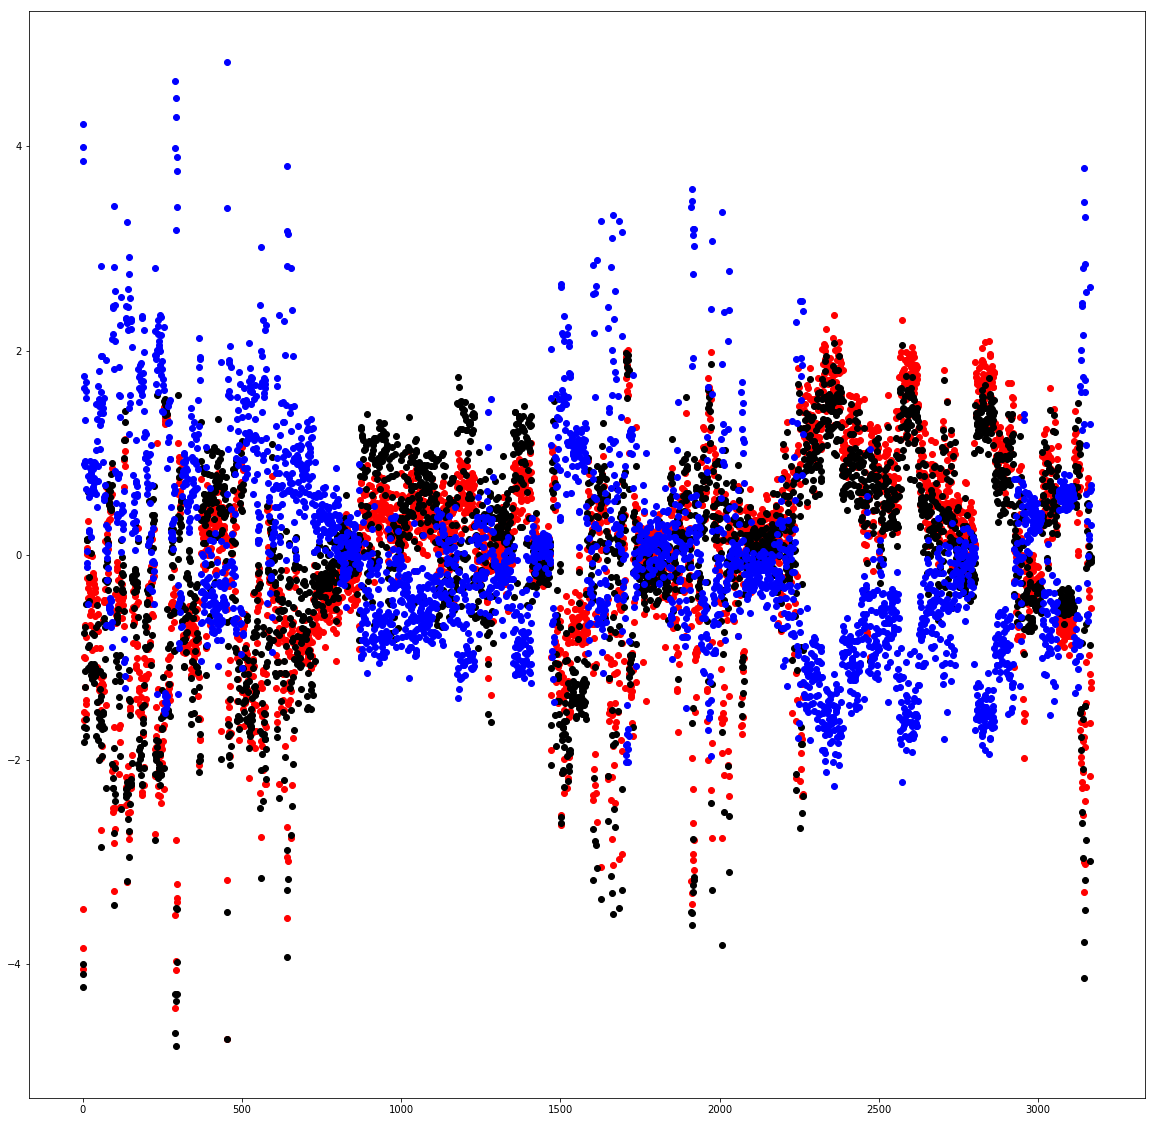

In [8]:
import matplotlib.pyplot as plt



plt.figure(figsize=(20,20))
plt.scatter(range(len(df['meanfreq'])),x_1,color='red')
plt.scatter(range(len(df['median'])),x_2,color='black')
plt.scatter(range(len(transformed_X)),transformed_X,color='blue')

In [10]:
df.insert(0,'trans_mean_median',transformed_X)

x_1 = df['meanfreq']
x_2 = df['Q25']
x_1 = np.array(x_1)
x_2 = np.array(x_2)

x_1 = scale(x_1)
x_2 = scale(x_2)
X = []
for i in range(len(x_1)):
    X.append([x_1[i],x_2[i]])

X = np.array(X)

pca = PCA(n_components=1)
pca.fit(X)

transformed_X = pca.transform(X)
transformed_X = scale(transformed_X)
df.insert(0,'trans_mean_Q25',transformed_X)

x_1 = df['sp.ent']
x_2 = df['sfm']
x_1 = np.array(x_1)
x_2 = np.array(x_2)

x_1 = scale(x_1)
x_2 = scale(x_2)
X = []
for i in range(len(x_1)):
    X.append([x_1[i],x_2[i]])

X = np.array(X)

pca = PCA(n_components=1)
pca.fit(X)

transformed_X = pca.transform(X)
transformed_X = scale(transformed_X)
df.insert(0,'trans_sp_ent_sfm',transformed_X)

df = df.drop(['meanfreq','median','Q25','sp.ent','sfm'],axis=1)

In [11]:
df = df.drop(['centroid'],axis=1)

In [12]:
import numpy as np

label = df['label']

new_label = []
for val in label:
    if(val=='male'):
        new_label.append(0)
    else:
        new_label.append(1)

new_label = np.array(new_label)

In [13]:
df = df.drop(['label'],axis=1)

In [14]:
df.insert(len(df.columns),'label',new_label)

In [15]:
print(df)

      trans_sp_ent_sfm  trans_mean_Q25  trans_mean_median        sd       Q75  \
0            -0.223851        3.388568           4.216409  0.064241  0.090193   
1            -0.273903        3.236455           3.995349  0.067310  0.092666   
2             0.354788        3.155704           3.851935  0.083829  0.131908   
3            -1.715132        0.968479           0.892600  0.072111  0.207955   
4            -1.978765        1.431581           1.634549  0.079146  0.206045   
5            -1.745804        1.584578           1.752335  0.079557  0.209592   
6            -1.867298        1.015142           0.871166  0.074463  0.205718   
7            -1.646812        0.663108           0.926081  0.076767  0.231962   
8            -1.927912        1.210178           1.317995  0.078018  0.208587   
9            -2.077697        1.478114           1.692958  0.080350  0.201957   
10           -1.756147        0.818494           0.651663  0.071943  0.216740   
11           -1.818340      

In [12]:
data = df.values.tolist()

X = []
Y =[]
x_train = []
x_test = []
y_train = []
y_test = []

for row in data:
    Y.append(row[-1])
    X.append(row[:len(row)-1])
    
X = np.array(X)
Y = np.array(Y)

In [13]:
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle

X, Y = shuffle(X,Y)

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

/Users/rohith/anaconda3/envs/projects/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [15]:
print(x_train.shape)

(2534, 19)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

clf = XGBClassifier(n_estimators = 100)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))